In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Test Data/water_mass.csv')

# add 40 to the Angle from horizontal column
df['Angle from horizontal (deg)'] = df['Angle from horizontal (deg)'] + 90

# divide x distance by 1000 to get m
df['x distance from COM (m)'] = df['x distance from COM (mm)'] / 1000

# times mass by 2
df['Mass of water (kg)'] = df['Mass of water (kg)'] * 2

# remove Torque column
df = df.drop(columns=['Torque'])

df['Torque (Nm)'] = df['Mass of water (kg)'] * df['x distance from COM (m)']

df.head(20)

,Angle from horizontal (deg),Mass of water (kg),x distance from COM (mm),x distance from COM (m),Torque (Nm)
0,50,14.36,194.71,0.19471,2.796036
1,55,22.62,195.32,0.19532,4.418138
2,60,32.28,205.77,0.20577,6.642256
3,65,30.22,236.44,0.23644,7.145217
4,70,23.90,263.42,0.26342,6.295738
5,75,19.04,279.68,0.27968,5.325107
6,80,15.08,288.80,0.28880,4.355104
7,85,11.76,291.42,0.29142,3.427099
8,90,8.92,288.01,0.28801,2.569049
9,95,6.42,278.87,0.27887,1.790345


In [3]:
# convert the first column from degrees to radians
df['theta'] = df['Angle from horizontal (deg)'] * np.pi/180
df.head(20)

,Angle from horizontal (deg),Mass of water (kg),x distance from COM (mm),x distance from COM (m),Torque (Nm),theta
0,50,14.36,194.71,0.19471,2.796036,0.872665
1,55,22.62,195.32,0.19532,4.418138,0.959931
2,60,32.28,205.77,0.20577,6.642256,1.047198
3,65,30.22,236.44,0.23644,7.145217,1.134464
4,70,23.90,263.42,0.26342,6.295738,1.221730
5,75,19.04,279.68,0.27968,5.325107,1.308997
6,80,15.08,288.80,0.28880,4.355104,1.396263
7,85,11.76,291.42,0.29142,3.427099,1.483530
8,90,8.92,288.01,0.28801,2.569049,1.570796
9,95,6.42,278.87,0.27887,1.790345,1.658063


-21.434243694585113 51.40072117993877 -24.83940255011682


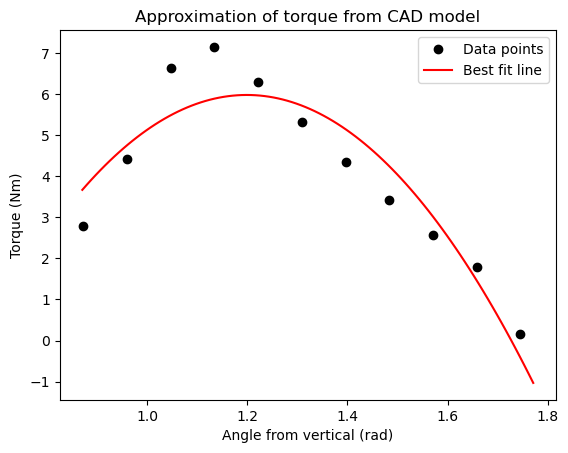

In [4]:


# plot a curved line of best fit

# find the coefficients of the best fit line
a,b, c = np.polyfit(df['theta'], df['Torque (Nm)'], 2)

# create a list of x values
x = np.linspace(np.pi/2 - 0.7, np.pi/2 +0.2, 100)

# create a list of y values
y = a*x**2 + b*x + c

# plot the line
plt.plot(df['theta'], df['Torque (Nm)'], 'o', color='black', label='Data points')
plt.plot(x, y, color='red', label='Best fit line')
plt.xlabel('Angle from vertical (rad)')
plt.ylabel('Torque (Nm)')
plt.title('Approximation of torque from CAD model')
plt.legend()


print(a, b, c)



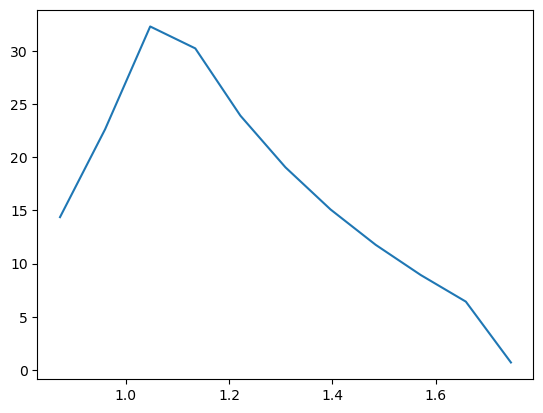

In [5]:
plt.plot(df['theta'], df['Mass of water (kg)'])

/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_31460/668815317.py:13: RuntimeWarning: divide by zero encountered in divide
  torque = 60 * vol_flow_rate / (n_blades * RPM)


Text(0.5, 1.0, 'Torque vs RPM')

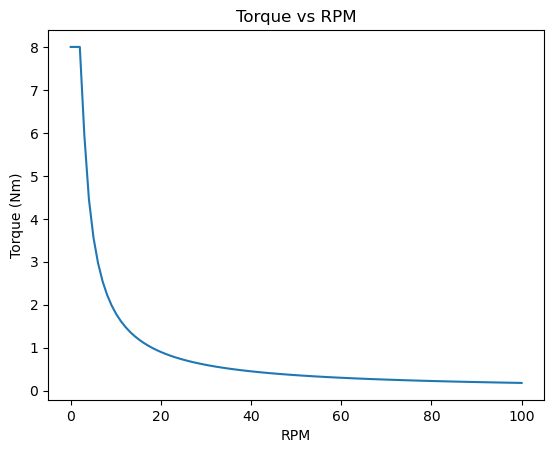

In [12]:
# modify the torque array to scale as a function of number of blades and RPM and river.vol_flow_rate
# the max torque will occur at an rpm when: bucket volume * n_blades = vol_flow_rate * 60
# volume = (RPM * 60 * vol_flow_rate) / (n_blades * max bucket)


# define constants
max_bucket = 8 # m^3
n_blades = 5
vol_flow_rate = 1.5 # m^3/s
RPM = np.linspace(0, 100, 100)

# calculate the volume of each bucket at each rpm
torque = 60 * vol_flow_rate / (n_blades * RPM)

for i in range(len(torque)):
    if torque[i] > max_bucket:
        torque[i] = max_bucket


# plot the torque vs RPM
plt.plot(RPM, torque)
plt.xlabel('RPM')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs RPM')
